In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'c:\Users\yunis\Downloads\Iris (1).csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

In [5]:
X = df.drop(['Species', 'SpeciesEncoded'], axis=1)

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

c:\Users\yunis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yunis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
print("KMeans Confusion Matrix:")
print(confusion_matrix(df['SpeciesEncoded'], kmeans_labels))

KMeans Confusion Matrix:
[[ 0 50  0]
 [ 0  0 50]
 [50  0  0]]


In [8]:
linked = linkage(X, method='ward')
hier_labels = fcluster(linked, 3, criterion='maxclust')

print("\nHierarchical Clustering Confusion Matrix:")
print(confusion_matrix(df['SpeciesEncoded'], hier_labels - 1))


Hierarchical Clustering Confusion Matrix:
[[50  0  0]
 [11 39  0]
 [ 0  0 50]]


<Axes: title={'center': 'KMeans Clustering'}>

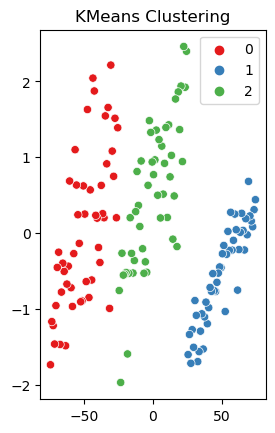

In [12]:
plt.subplot(1, 2, 1)
plt.title("KMeans Clustering")
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1')

<Axes: title={'center': 'Hierarchical Clustering'}>

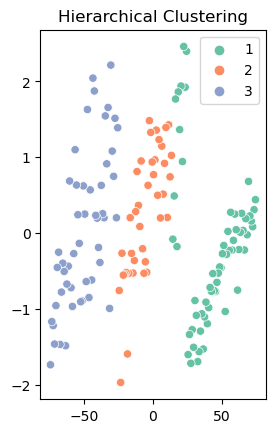

In [13]:
plt.subplot(1, 2, 2)
plt.title("Hierarchical Clustering")
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hier_labels, palette='Set2')